In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , recall_score,precision_score, confusion_matrix , classification_report
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

In [7]:
data = pd.read_csv("/content/train.csv")

In [8]:
data.shape

(76518, 38)

In [9]:
data.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [11]:
data.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [12]:
data.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [13]:
data['Scholarship holder'].unique()

array([1, 0])

In [14]:
data = data.dropna()


In [15]:
data.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

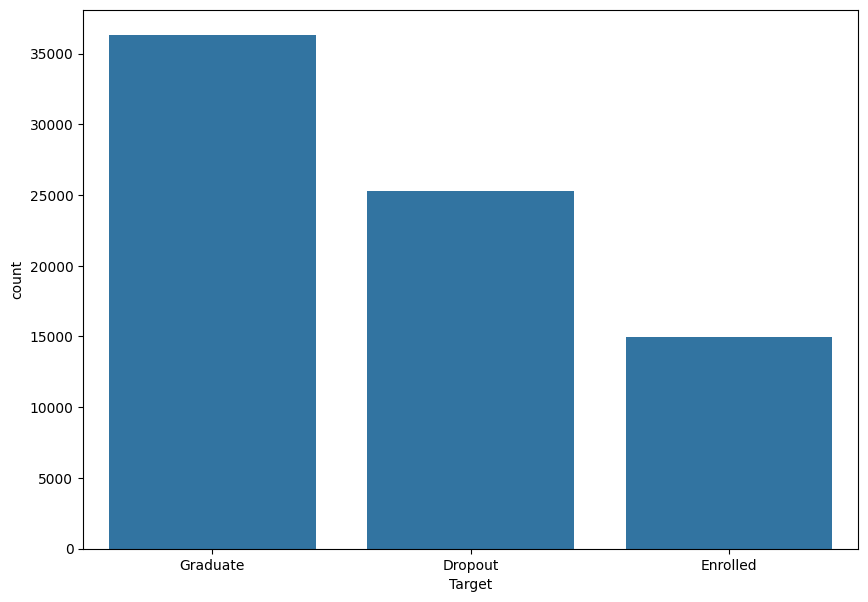

In [16]:
#There is an increase in dropout which is almost equal to graduates

plt.figure(figsize=(10,7))
sns.countplot(data , x ='Target')

plt.show()

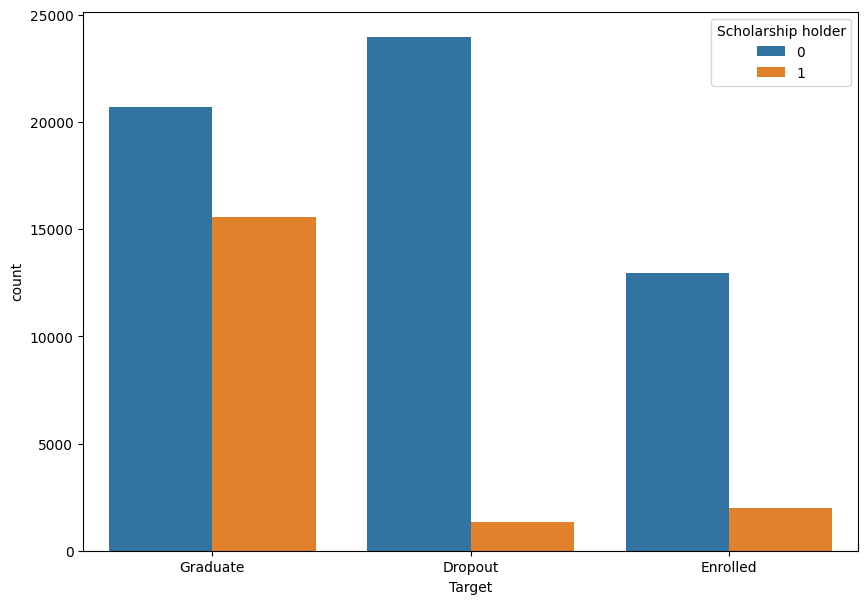

In [17]:
#There is significately less scholarship holders in dropouts

plt.figure(figsize=(10,7))
sns.countplot(data , x ='Target' ,  hue = "Scholarship holder")

plt.show()

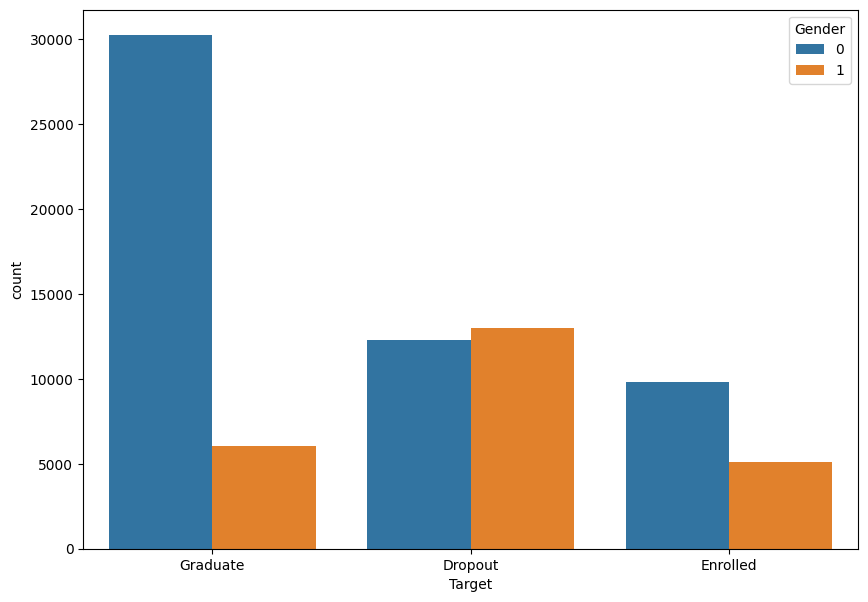

In [18]:
#The data was already processed
#one of the genders has less graduates and almost has significant dropouts

plt.figure(figsize=(10,7))
sns.countplot(data , x ='Target' ,  hue = "Gender")

plt.show()

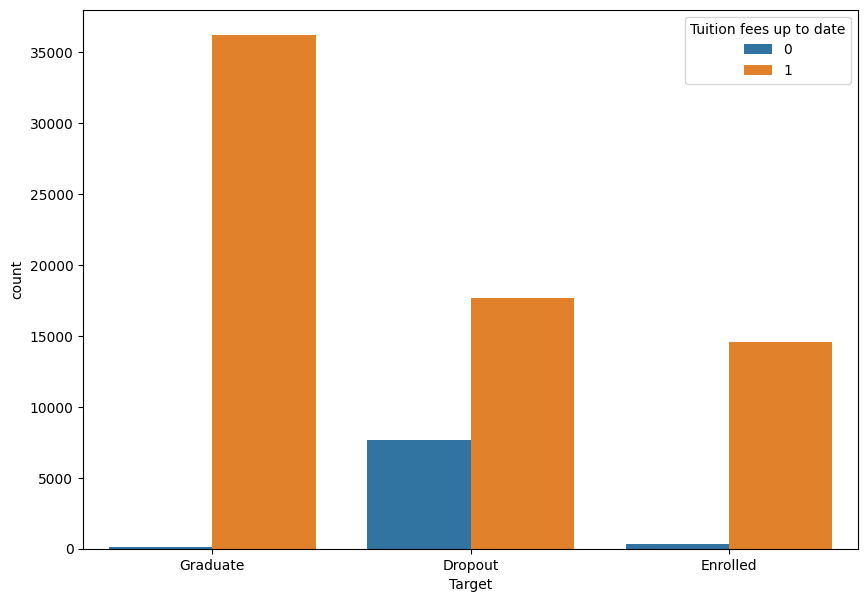

In [19]:
#Tuition fees is not upto date for dropouts compared to other variables

plt.figure(figsize=(10,7))
sns.countplot(data , x ='Target' ,  hue = "Tuition fees up to date")

plt.show()

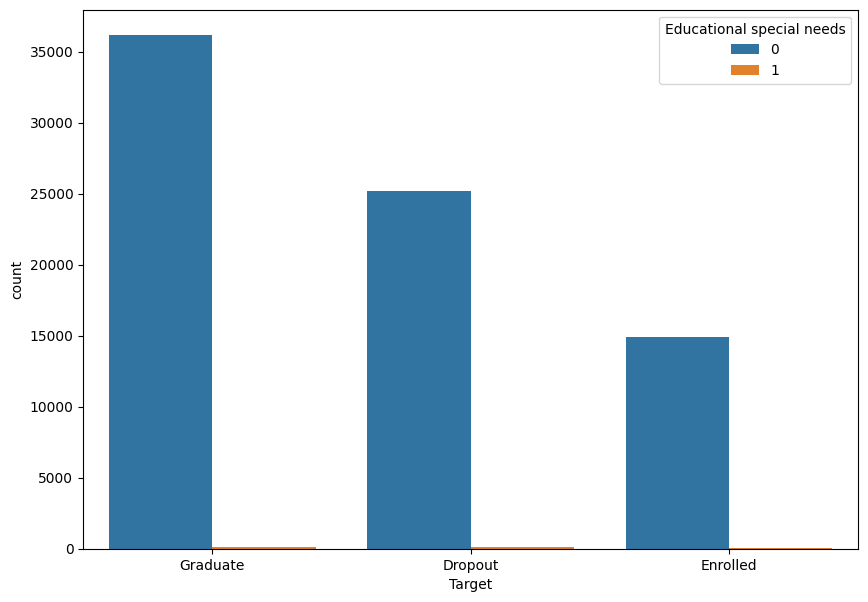

In [20]:
#Educational special needs is significantly lower

plt.figure(figsize=(10,7))
sns.countplot(data , x ='Target' ,  hue = "Educational special needs")

plt.show()

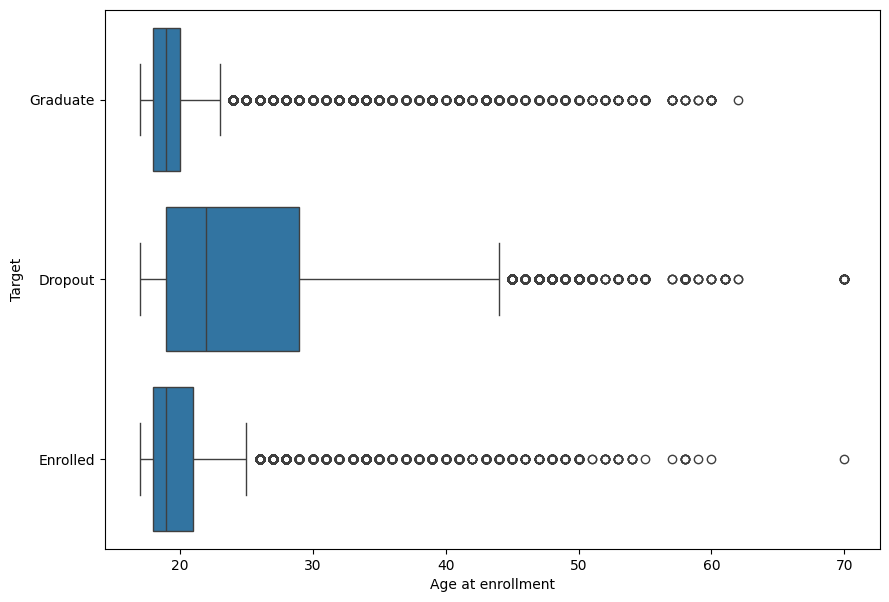

In [21]:
#The age group above 20 has more  dropouts
plt.figure(figsize=(10,7))
sns.boxplot(data=data, x="Age at enrollment", y="Target")

plt.show()

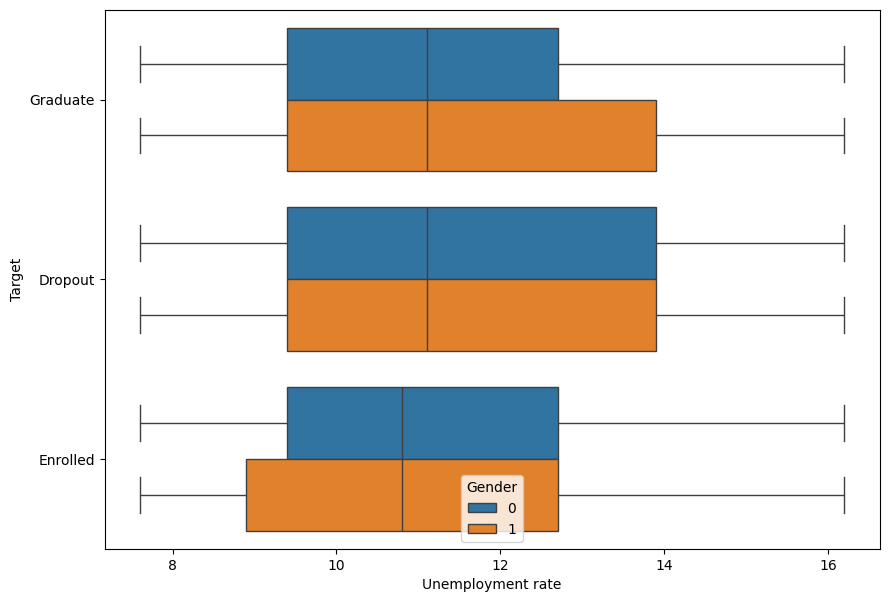

In [22]:

#the unemployment rate in graduates is almosts similar to dropouts

plt.figure(figsize=(10,7))
sns.boxplot(data=data, x="Unemployment rate", y="Target" , hue = "Gender")

plt.show()

#data['Unemployment rate'].head()

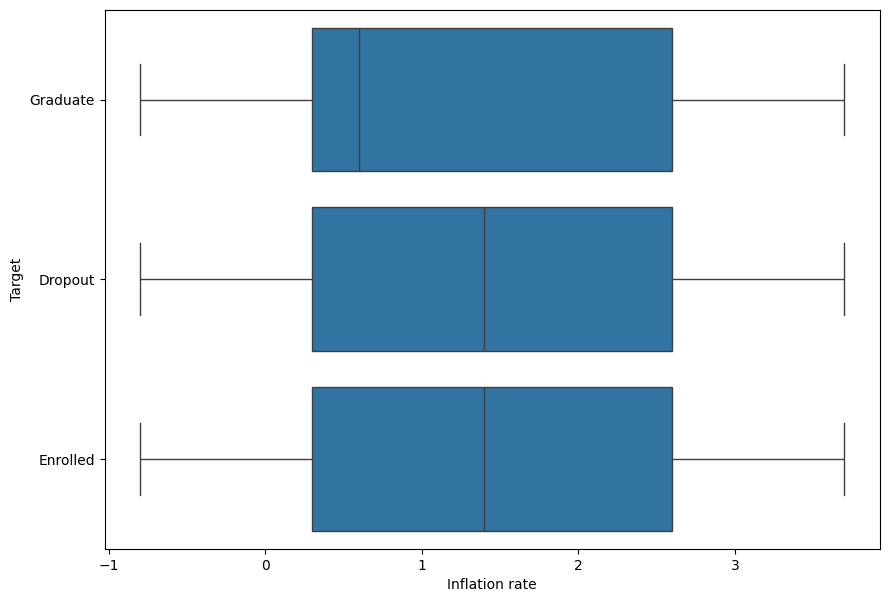

In [23]:
#average inflation rate for graduates is low compared to other variables
plt.figure(figsize=(10,7))
sns.boxplot(data=data, x="Inflation rate", y="Target")

plt.show()

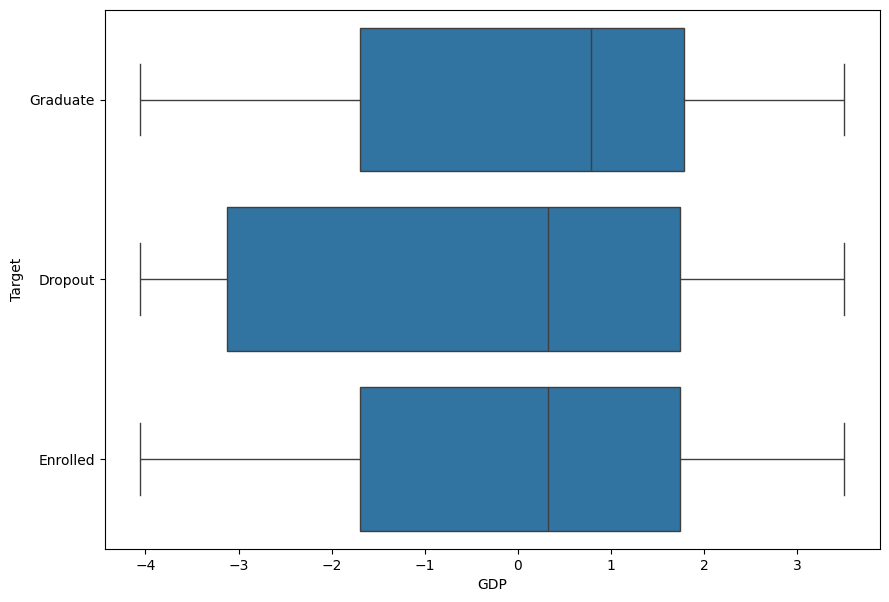

In [24]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data, x="GDP", y="Target")

plt.show()

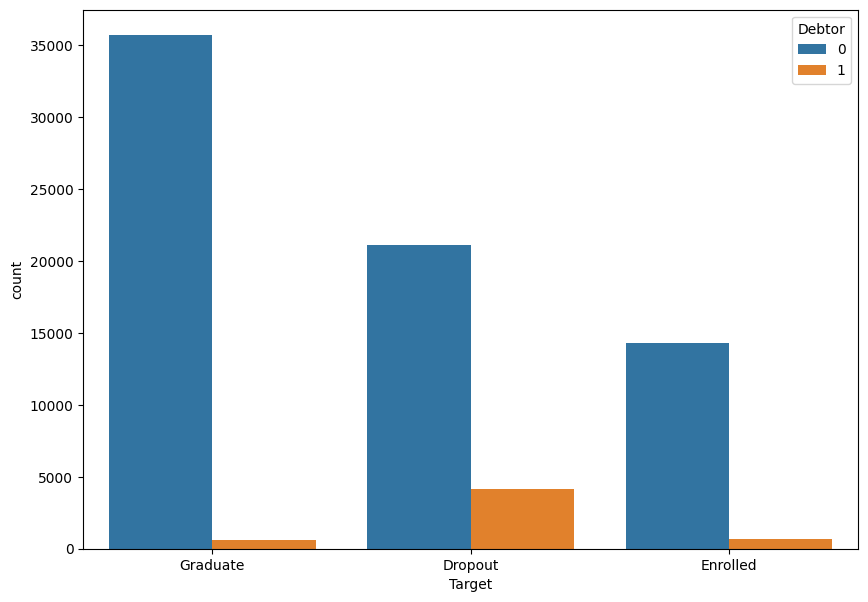

In [25]:

#The debtors in dropouts are more compared to other variables
#but it does not signify the increase in dropouts because large sum of dropouts are not debtors

plt.figure(figsize=(10,7))
sns.countplot(data , x ='Target' ,  hue = "Debtor")

plt.show()

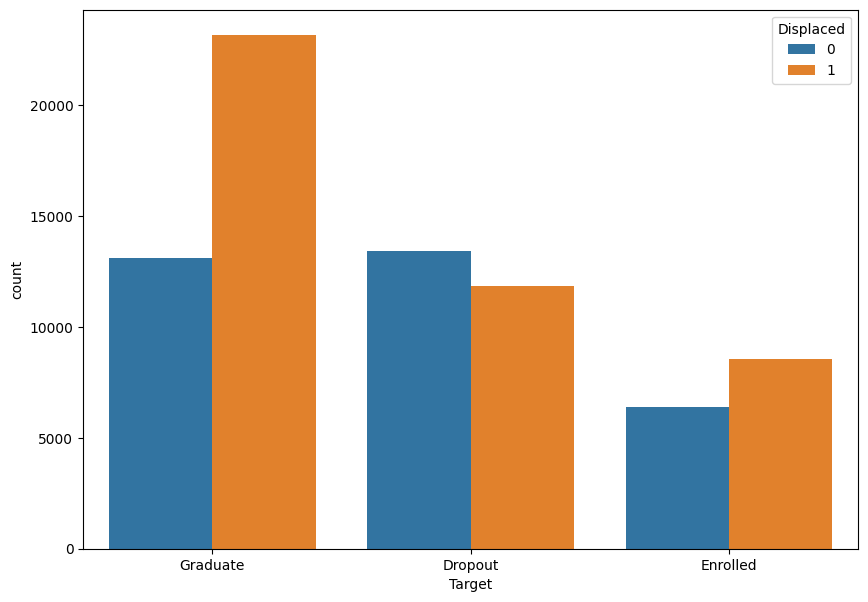

In [26]:
#more gradutaes compared to other variables are displaced

plt.figure(figsize=(10,7))
sns.countplot(data=data, x="Target" ,hue="Displaced")

plt.show()

#data['Displaced'].unique()

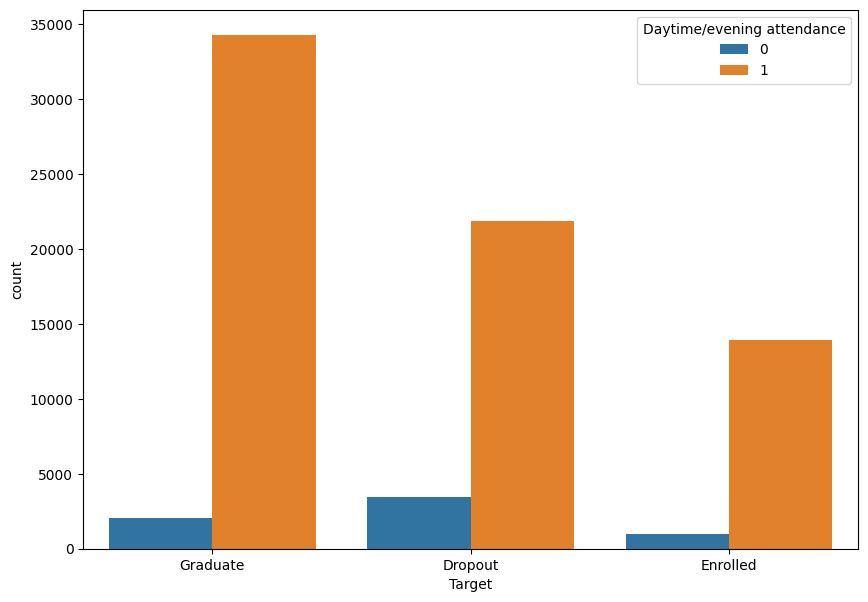

In [27]:
# attendance is significantly higher for all the variables

plt.figure(figsize=(10,7))
sns.countplot(data=data, x="Target" ,hue='Daytime/evening attendance')

plt.show()

#data['Daytime/evening attendance'].unique()

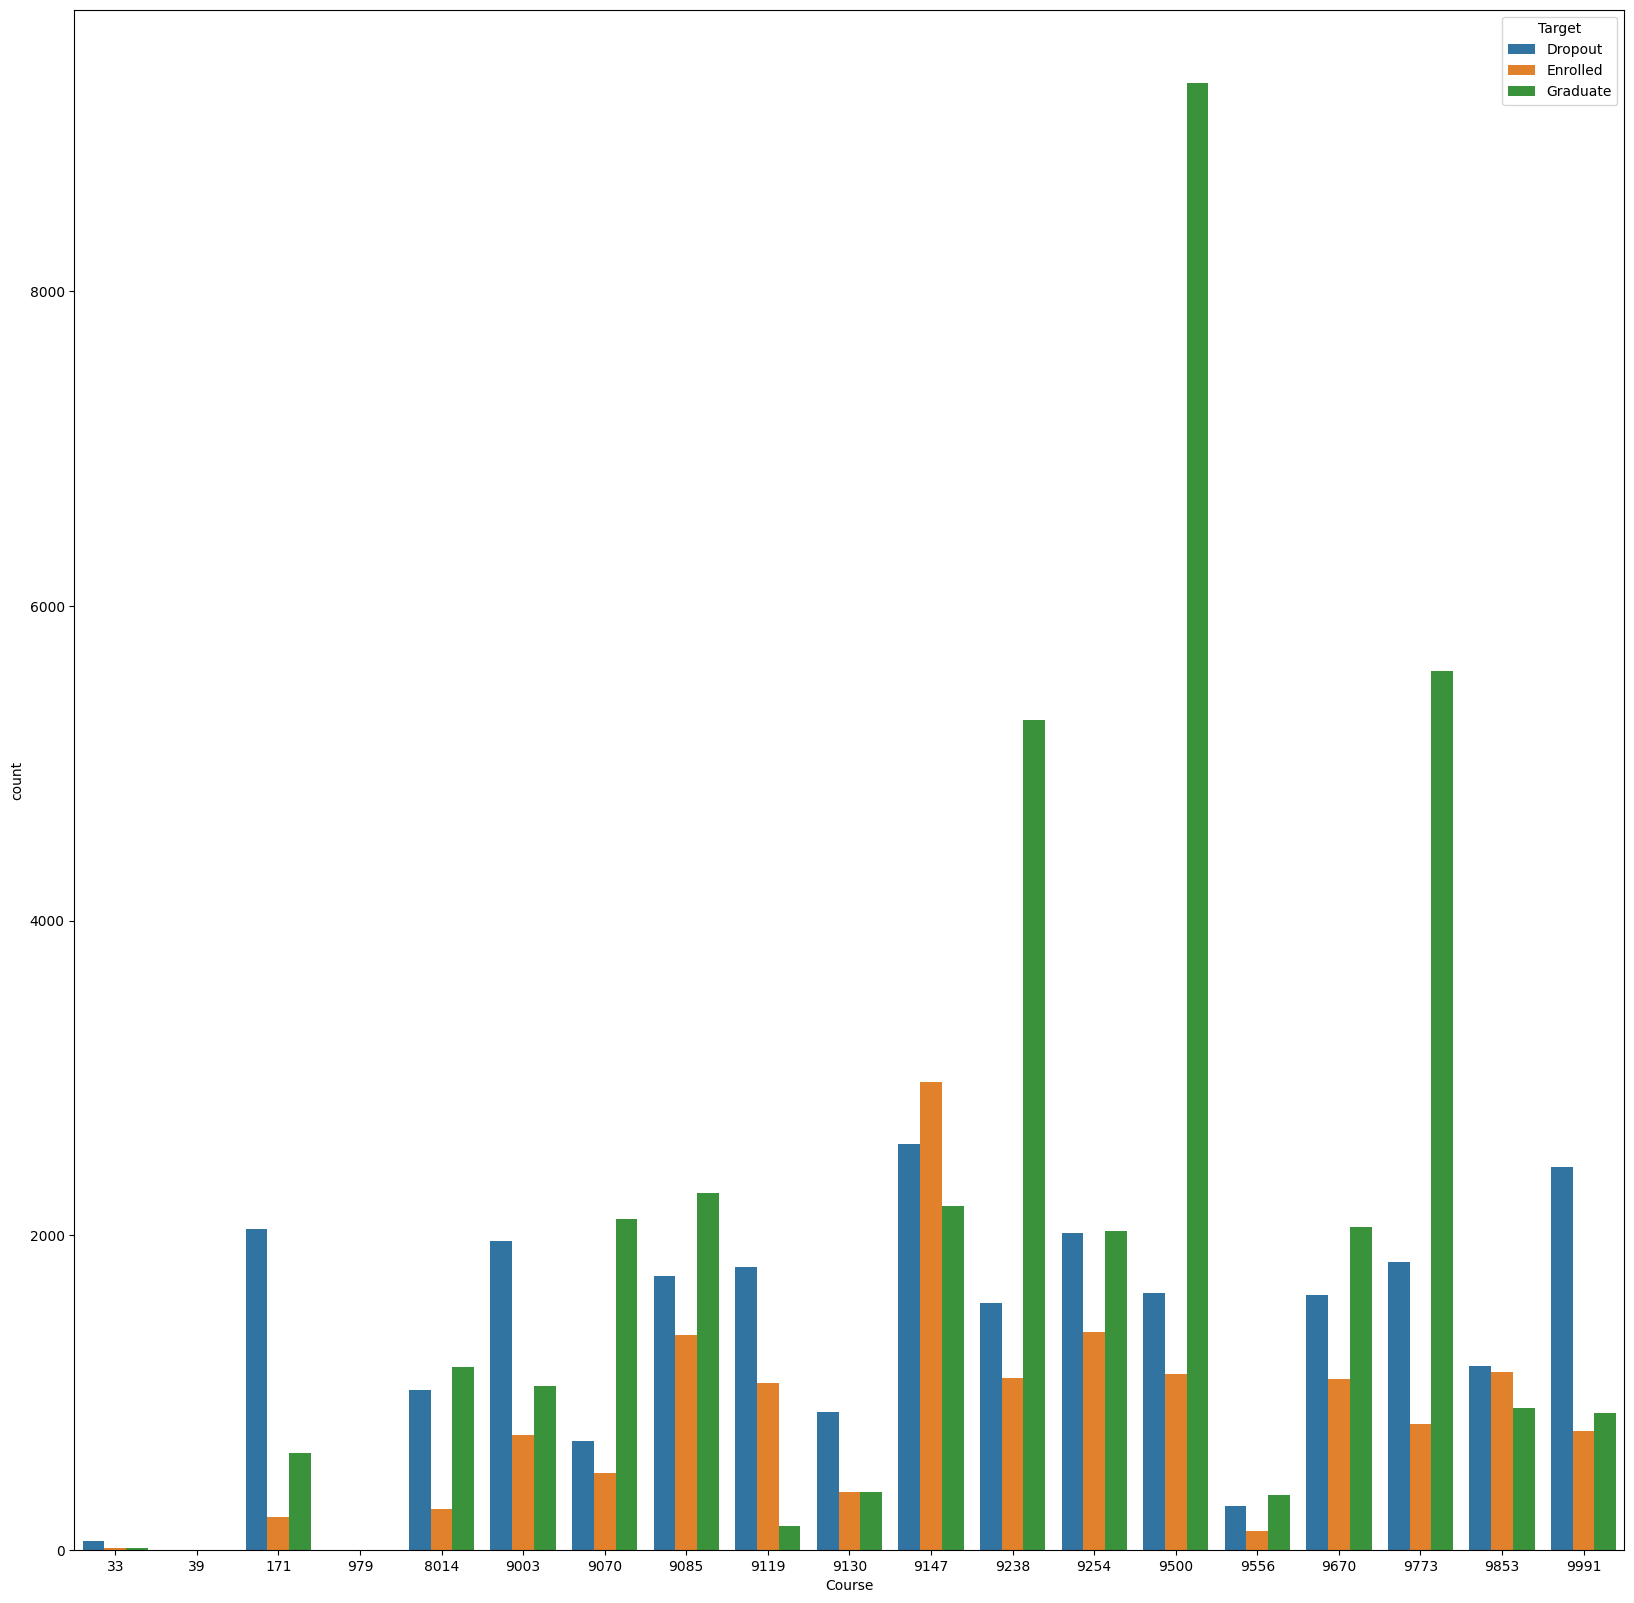

In [28]:
#Graduation is high for course #9500

plt.figure(figsize=(20,20))
sns.countplot(data=data, x="Course" , hue = "Target")

plt.show()



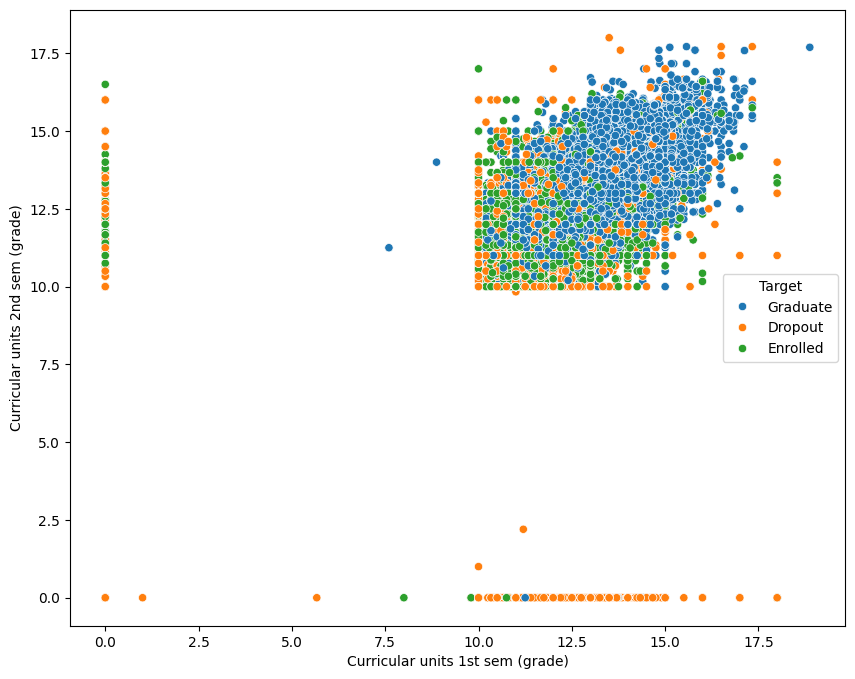

In [29]:
#In both semister majority students have scored good grades
plt.figure(figsize = (10,8))
sns.scatterplot(data=data, x="Curricular units 1st sem (grade)", y="Curricular units 2nd sem (grade)", hue="Target")
plt.show()

In [30]:
#remove irrelavant columns

data = data.drop(columns = ['id' ,'Application mode','Application order' ,"International" , "Nacionality"] , axis = 1)

In [31]:
#columns are removed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 33 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Course                                          76518 non-null  int64  
 2   Daytime/evening attendance                      76518 non-null  int64  
 3   Previous qualification                          76518 non-null  int64  
 4   Previous qualification (grade)                  76518 non-null  float64
 5   Mother's qualification                          76518 non-null  int64  
 6   Father's qualification                          76518 non-null  int64  
 7   Mother's occupation                             76518 non-null  int64  
 8   Father's occupation                             76518 non-null  int64  
 9   Admission grade                        

In [32]:
from sklearn.preprocessing import LabelEncoder


In [33]:
encode = LabelEncoder()

In [34]:
data['Target'] = encode.fit_transform(data['Target'])


In [35]:
data['Course'] = encode.fit_transform(data['Course'])

In [36]:
#'Graduate', 'Dropout', 'Enrolled'
data['Debtor'].unique()

array([0, 1])

In [37]:
#spliting into train and test

df_train , df_test = train_test_split(data, train_size= 0.7 , random_state= 100)

print(df_train.shape , df_test.shape)

(53562, 33) (22956, 33)


In [38]:
# Instantiate an object

scaler = MinMaxScaler()

#except for binary variables we will be scaling all numeric variables
vars = ['Gender' , 'Debtor', 'Tuition fees up to date' , 'Scholarship holder' , 'Displaced', 'Daytime/evening attendance', "Marital status", "Mother's qualification" , "Father's qualification" ,"Mother's occupation" , "Father's occupation"]

#fit on data

df_train[vars] = scaler.fit_transform(df_train[vars])

df_train.head()

,Marital status,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
25852,0.0,13,1.0,1,130.0,0.418605,0.860465,0.046392,0.046154,131.5,...,0,8,8,8,15.125,0,12.4,0.5,1.79,2
36966,0.2,18,0.0,1,130.0,0.837209,0.837209,0.046392,0.025641,120.0,...,0,5,9,3,12.000,0,12.4,0.5,1.79,1
3240,0.0,18,0.0,1,120.0,0.837209,0.837209,0.046392,0.046154,120.0,...,0,5,5,0,0.000,0,9.4,-0.8,-3.12,1
40438,0.0,15,1.0,1,120.0,0.837209,0.860465,0.025773,0.025641,113.8,...,0,5,7,5,12.200,0,7.6,2.6,0.32,1
11261,0.0,9,1.0,1,157.0,0.046512,0.046512,0.015464,0.035897,150.9,...,0,6,8,6,14.000,0,13.9,-0.3,0.79,2


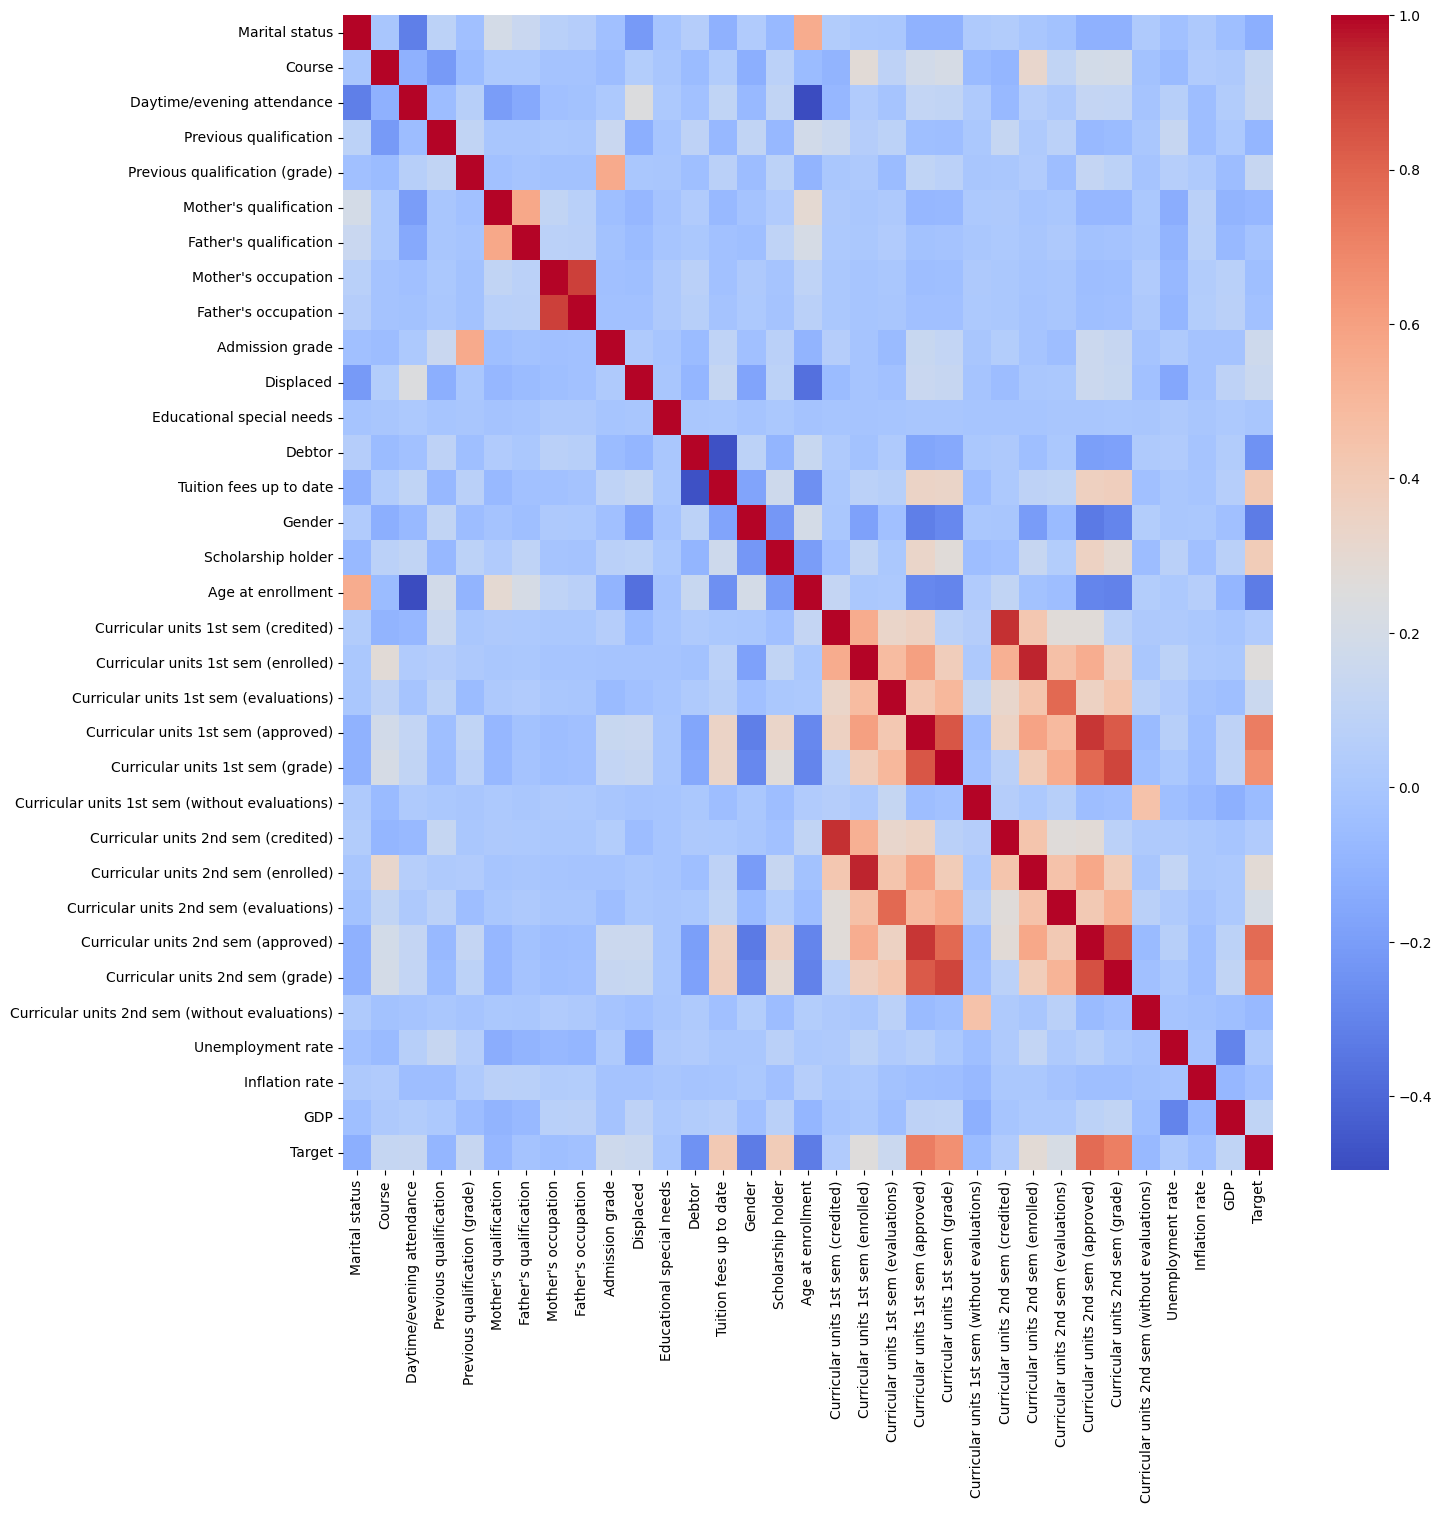

In [39]:
#Heat map
plt.figure(figsize = (15,15))
sns.heatmap(df_train.corr(),annot=False, cmap='coolwarm')
plt.show()


In [40]:
#split data

y_train = df_train.pop('Target')
X_train = df_train

In [41]:
df_test[vars] = scaler.transform(df_test[vars])

y_test = df_test.pop('Target')
X_test = df_test

In [42]:
#Rfe
from sklearn.feature_selection import RFE

logreg = LogisticRegression()

logreg.fit(X_train , y_train)

rfe = RFE(estimator= logreg, n_features_to_select=20)
rfe = rfe.fit(X_train , y_train)

list(zip(X_train.columns , rfe.support_ , rfe.ranking_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[('Marital status', False, 4),
 ('Course', True, 1),
 ('Daytime/evening attendance', True, 1),
 ('Previous qualification', False, 10),
 ('Previous qualification (grade)', False, 11),
 ("Mother's qualification", True, 1),
 ("Father's qualification", True, 1),
 ("Mother's occupation", True, 1),
 ("Father's occupation", False, 2),
 ('Admission grade', False, 12),
 ('Displaced', True, 1),
 ('Educational special needs', False, 13),
 ('Debtor', True, 1),
 ('Tuition fees up to date', True, 1),
 ('Gender', True, 1),
 ('Scholarship holder', True, 1),
 ('Age at enrollment', False, 3),
 ('Curricular units 1st sem (credited)', False, 5),
 ('Curricular units 1st sem (enrolled)', True, 1),
 ('Curricular units 1st sem (evaluations)', True, 1),
 ('Curricular units 1st sem (approved)', True, 1),
 ('Curricular units 1st sem (grade)', False, 9),
 ('Curricular units 1st sem (without evaluations)', True, 1),
 ('Curricular units 2nd sem (credited)', True, 1),
 ('Curricular units 2nd sem (enrolled)', True, 1

In [43]:
col = X_train.columns[rfe.support_]
col

Index(['Course', 'Daytime/evening attendance', 'Mother's qualification',
       'Father's qualification', 'Mother's occupation', 'Displaced', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['Marital status', 'Previous qualification',
       'Previous qualification (grade)', 'Father's occupation',
       'Admission grade', 'Educational special needs', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Inflation rate',
       'GDP'],
      dtype='object')

In [45]:
#Building model

X_train_rfe = X_train[col]


In [46]:
#X_train_rfe = sm.add_constant(X_train_rfe)
#logm2 = sm.GLM(y_train , X_train_rfe , family = sm.families.Binomial())

logm2 = LogisticRegression()
res = logm2.fit(X_train_rfe , y_train)
#print(res.summary())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
y_train_pred = res.predict(X_train_rfe)

print(y_train_pred[:10])

[2 0 0 2 2 2 2 2 2 0]


In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_train = accuracy_score(y_train , y_train_pred)
print(accuracy_train)

0.8108360404764572


In [50]:
X_test_rfe = X_test[col]
y_test_pred = res.predict(X_test_rfe)

print(y_test_pred[:10])

[1 0 2 2 2 1 0 2 2 1]


In [51]:
accuracy_test = accuracy_score(y_test , y_test_pred)
print(accuracy_test)

0.8137741766858337


In [52]:
#training the train data accuracy

#X_train_prediction = model.predict(X_train)

train_data = confusion_matrix(y_train , y_train_pred)
print(classification_report(y_train , y_train_pred))
#train_data_precision = precision_score(X_train_prediction , y_train)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85     17825
           1       0.62      0.53      0.57     10423
           2       0.83      0.92      0.87     25314

    accuracy                           0.81     53562
   macro avg       0.78      0.76      0.76     53562
weighted avg       0.81      0.81      0.81     53562



In [53]:
train_data = confusion_matrix(y_test , y_test_pred)
print(classification_report(y_test , y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7471
           1       0.62      0.52      0.57      4517
           2       0.83      0.93      0.88     10968

    accuracy                           0.81     22956
   macro avg       0.78      0.76      0.77     22956
weighted avg       0.81      0.81      0.81     22956

